<h1 align="center">INF280 - Laboratorio de Estadística Computacional</h1>
<center>
<img src="https://treelogic.com/es/assets/images/data-science-1400x933.jpg" width="60%"></img>
<h2 align="center">LEC 2: Frecuentistas vs Bayesianos</h2>

<i> Notebook creado por Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM - Mayo 2020.</i>
</center>



## Objetivo

Aprender a utilizar herramientas y técnicas básicas de la estimación paramétrica frecuentista y bayesiana, para la estudio de diversos fenómenos aleatorios.


## Instrucciones

* Los informes deben ser desarrollados en grupos de 3 personas definidas al comienzo del semestre. Cualquier cambio debe ser informado previamente a los ayudantes para su autorización.
* El informe debe seguir las instrucciones (__Instrucciones del Informe__) de desarrollo correspondiente a cada entrega.  (i.e. entregar un preinforme, completando código donde sea indicado, respondiendo las preguntas planteadas, generar informes, etc)
* Debe argumentar sus respuestas basándose en los resultados obtenidos en sus experimentos. De no ser así, no podrán optar al puntaje máximo de la pregunta.
* Los gráficos deben ser legibles y fáciles de entender. Esto es utilizar el gráfico adecuado al problema; usar escalas correctas; incluir títulos, nombres de ejes y leyenda.
* El código debe ser legible.
* Cualquier consulta o queja debe realizarse a través de la plataforma Moodle o en el servidor de Discord.
* Por cada día de atraso se descuentan 10 puntos de la nota máxima a alcanzar.
Los trabajos que sean resultado de copia o plagio de otros trabajos, serán automáticamente evaluados con nota 0.


## Aprendizaje Esperado

Los y las estudiantes deben ser capaces de:

* Utilizar las herramientas básicas para le simulación de eventos aleatorios disponibles en los softwares estadísticos (Python o R-Project).

* Ser capaces de identificar problemas que pueden ser solucionados a través de métodos de probabilisticos como simulación y el teorema de bayes.

* Ser capaces de realizar un análisis comparativos entre gráficos y resultados obteniendo conclusiones que se infieren de este mismo análisis.

## Instrucciones del Informe

* Complete el código necesario  (```# COMPLETAR```) o implemente la funciones necesarias para obtener el resultado deseado. 
* Complete las preguntas argumentando con los resultados obtenidos, cada pregunta tiene una celda marcada donde debe contestar.
<font color="greed"> COMPLETAR </font>
*  El puntaje máximo es del informe es de 100, cada pregunta indica su puntaje asignado. **Cada item** será evaluado según la rubrica disponible en Moodle. (puntaje máximo 5 es escalado al <font color='red'>puntaje de  cada item.</font>)
* El código debe ser legible, comente de manera adecuada y evite la modularización (_simple is better than complex - [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3)_)

* No edite funciones si no se les indica. 

## Material de Apoyo

* [Vectores, Eventos Aleatorios y Probabilidad](https://github.com/sborquez/Python-LEC/blob/master/2.%20Vectores%2C%20Eventos%20Aleatorios%20y%20Probabilidad.ipynb)
* [Numpy Doc](https://numpy.org/doc/1.18/reference/index.html)
* [PyMC3: Probabilistic Programming in Python](https://docs.pymc.io/)
* [Graph Gallery](https://python-graph-gallery.com/)
* [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Matplot Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

## Información del Grupo






<center><h2>Grupo COMPLETAR<h2/><center/>

| Rol| Nombre | Correo |
| ---------- | ---------- | ---------- |
| COMPLETAR  | COMPLETAR   | COMPLETAR |
| COMPLETAR   | COMPLETAR  | COMPLETAR |
| COMPLETAR   | COMPLETAR  | COMPLETAR |

In [1]:
# DataFrames
import pandas as pd

# Arreglos multidimensionales
import numpy as np
import math
from scipy import stats

# Modulos para visualizaciones
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from IPython.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 0. Notebooks y herramientas multicódigo

A medida que se profundiza en el mundo estadístico y de la ciencia de datos, la discusión por el uso de lenguajes se suele ver reducida a pocas herramientas, normalmente **Python**, **R**, **Julia** o **MATLAB**. El mundo suele decantarse por el lenguaje más popular, siendo este **Python** debido a su versatilidad y adaptabilidad, pero como buenos informáticos no podemos dejar de conocer el resto de alternativas disponibles, después de todo, toda herramienta tiene su uso adecuado. Así como **Python** establece sus bases en la versatilidad a través de sus imports, **R** es un lenguaje que se especializa en el análisis estadístico y el desarrollo de herramientas de análisis y visualización, **Julia** busca crear un punto medio entre ambos mientras crece en popularidad como lenguaje moderno, y **MATLAB** suele ser el mejor amigo de los matemáticos.

Para este item, se mostrará una herramienta que permite combinar la ejecución de **R** y **Python** en un mismo notebook de Colab, y se mostrará la equivalencia entre estructuras y métodos entre lenguajes a la vez que se introducen algunas operaciones vectoriales usando arreglos (Si alguien quiere iluminarse en la grandeza de los notebooks de R-markdown, también es posible tener código **Python** usando [*reticulate*](https://rstudio.github.io/reticulate/)). 

###0.1 Instalando rpy2
Para poder usar **R** en el ambiente de **Python** de Colab existe el paquete rpy2, a continuación veremos su uso.

Primero, instalamos el paquete mediante el instalador de paquetes de **Python** pip.

In [ ]:
!pip install rpy2

###0.2 Usando rpy2
La forma de usar rpy2 es muy simple, solo se debe cargar la extensión (después de instalarla) usando el siguiente código:

In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Para crear una celda con código en R, solo se debe agregar la expresión "%%R" en la primera línea de la celda, y luego escribir el código con la sintaxis de R. Veamos una muestra a continuación:

In [ ]:


# Operaciones sobre un arreglo en python

u = np.array(range(15))
v = np.ones(15)
print("u+2:", u+2)
print("u*2:", u*2)
print("u^2:", u**2)
print("u+v:", u+v)
print("u-v:", u-v)
print("u*v:", u*v) #Multiplicación de arreglos != multiplicación de vectores

#Operacion compuesta

print("0.1((4u - 5v)*u^2)^3:", 0.1*((4*u - 5*v)*(u**2))**3)

#Reducción

print("máx 0.1((4u - 5v)*u^2)^3:", max(0.1*((4*u - 5*v)*(u**2))**3))

u+2: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
u*2: [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]
u^2: [  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196]
u+v: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
u-v: [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
u*v: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
0.1((4u - 5v)*u^2)^3: [-0.00000000e+00 -1.00000000e-01  1.72800000e+02  2.50047000e+04
  5.45177600e+05  5.27343750e+06  3.20013504e+07  1.43143538e+08
  5.15978035e+08  1.58321588e+09  4.28750000e+09  1.05087227e+10
  2.37406630e+10  5.01133791e+10  9.98800480e+10]
máx 0.1((4u - 5v)*u^2)^3: 99880047993.6


In [ ]:
%%R

#Operaciones sobre un arreglo en R

u <- 0:14
v <- rep(1, 15)
cat("u+2:", u+2, "\n")
cat("u*2:", u*2, "\n")
cat("u*2:", u**2, "\n")
cat("u+v:", u+v, "\n")
cat("u-v:", u-v, "\n")
cat("u*v:", u*v, "\n") #Si fueran vectores, el resultado sería una matriz!!

#Operacion compuesta

cat("0.1((4u - 5v)*u^2)^3:", 0.1*((4*u - 5*v)*(u**2))**3, "\n")

#Reducción

cat("máx 0.1((4u - 5v)*u^2)^3:", max(0.1*((4*u - 5*v)*(u**2))**3), "\n")

u+2: 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 
u*2: 0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 
u*2: 0 1 4 9 16 25 36 49 64 81 100 121 144 169 196 
u+v: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
u-v: -1 0 1 2 3 4 5 6 7 8 9 10 11 12 13 
u*v: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
0.1((4u - 5v)*u^2)^3: 0 -0.1 172.8 25004.7 545177.6 5273438 32001350 143143538 515978035 1583215883 4287500000 10508722696 23740662989 50113379081 99880047994 
máx 0.1((4u - 5v)*u^2)^3: 99880047994 


Además, como es normal pensar, la estructura DataFrame implementada en pandas también existe en R, pueden ver la comparación entre métodos en la misma [documentación de pandas.](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html)

##Antes de empezar
*Considerando la importancia de que los alumnos conozcan más de 1 lenguaje, pero también tomando en cuenta la dificultad que implica empezar con la sintaxis de un lenguaje nuevo, es que este laboratorio será hecho mayoritariamente con Python. Solo en la **pregunta 1** se pedirá que respondan en ambos lenguaje, R y Python. En la **pregunta 2** se entregarán códigos de ayuda en R, pero las respuestas serán en Python. En la **pregunta 3**, las respuestas serán con Python.*

##1. Muestreo y convergencia

El concepto de [muestreo](https://es.wikipedia.org/wiki/Muestreo_(estad%C3%ADstica)) está íntimamente relacionado con las probabilidades, ya que se basa en estas mismas para crear muestras de datos de una población. La gracia de usar muestras es buscar obtener un conjunto representativo que a su vez sea accesible y se pueda trabajar sobre él. Como sabemos, acceder a una población de datos suele ser un proceso altamente engorroso y exhaustivo.

En general, cuando se trabaja con muestreo y convergencia, se suele pasar por las siguientes 3 etapas:

###1.1 Conjuntos de elementos
Para representar a los elementos a muestrear basta con declara un arreglo o lista que contenga datos que representen a cada elemento de forma biyectiva.

Para entender el proceso de muestreo, *arrastraremos* un ejemplo a lo largo del ejercicio. Este será un clásico [juego de rol](https://en.wikipedia.org/wiki/Tabletop_role-playing_game), en el que se usan dados para resolver tiradas con una cierta dificultad.

Como primera etapa, se deben definir los conjuntos de elementos a muestrear, en este caso, los dados a usar. Usaremos un sistema que usa dados de 12 y 6 caras para resolver las pruebas (1d12 + Xd6, X según el nivel). A continuación, declaramos los conjuntos: 

* __1.1.1__: Completar ambos códigos complementarios, definiendo estructuras que representaran los dados. (<font color='red'>2 Puntos</font>)

In [ ]:
# Python
d12 = np.array(range(12)) + 1
d6 = np.array(range(6)) + 1
print('d12:', d12)
print('d6:', d6)

d12: [ 1  2  3  4  5  6  7  8  9 10 11 12]
d6: [1 2 3 4 5 6]


In [ ]:
%%R
#R
d12 <- 1:12
d6 <- 1:6
cat('d12:', d12, '\n')
cat('d6:', d6, '\n')

d12: 1 2 3 4 5 6 7 8 9 10 11 12 
d6: 1 2 3 4 5 6 


###1.2 Muestreo de conjuntos
Continuando con el ejemplo, pensemos que nos encontramos de aventuras por el *bosque negro*, y su presencia oscura nos obliga a cuestionar nuestros motivos y hacer una prueba de *corrupción* con dificultad 16.

¿En qué se traduce esto? suponiendo un nivel 2 para la prueba (2 dados de 6 caras), significa que el jugador debe realizar una tirada que incluya 1 dado de 12 caras y 2 dados de 6 caras. Si la suma de estos dados es igual o mayor a la dificultad, en este caso 16, se supera la prueba, en caso contrario, la prueba falla (y esto trae consigo consecuencias negativas ...)

Simularemos esto con ayuda de 2 métodos de muestreo:
- En Python, *numpy* incluye el método random.choice(), el que nos permitirá hacer el muestreo sin problemas.
- De forma similar, R incluye el método sample().

Es interesante notar que ambos método tienen los mismos argumentos, por lo que las similitudes son aparentes.


* __1.2.1__: Completar ambos códigos complementarios, logrando simular una tirada con los respectivos dados. (<font color='red'>3 Puntos</font>)

In [ ]:
# Python

# numpy.random.choice(a, size=None, replace=True, p=None)

tirada = np.random.choice(d12, size=1) + np.random.choice(d6, size=2, replace=True).sum()
print('Prueba de corrupción:', tirada)

Prueba de corrupción: [10]


In [ ]:
%%R
#R

# sample(x, size, replace = FALSE, prob = NULL)

tirada <- sample(d12, size=1) + sum(sample(d6, size=2, replace=TRUE))
cat('Prueba de corrupción:', tirada)

Prueba de corrupción: 19

###1.3 Gráficos de convergencia
Como pueden ver, en varios casos el jugador no pasa la prueba, y en otro sí. Más interesante es aún si queremos calcular la probabilidad de que el jugador pase la prueba.

Teóricamente, es posible obtener esta probabilidad usando combinaciones. Empíricamente, veremos lo que se conoce como gráfico de convergencia.

Repetiremos la tirada de forma iterativa, viendo cuál es la probabilidad de victoria en cada iteración, y aumentando el número de tiradas en cada iteración:

* __1.3.1__: Completar ambos códigos complementarios, logrando obtener gráficos de convergencia como los mostrados. Pueden usar puntos o líneas. (<font color='red'>5 Puntos</font>)

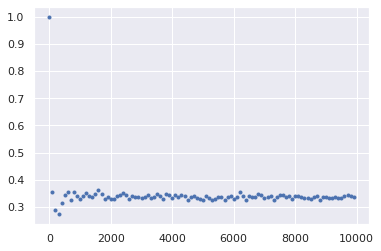

In [ ]:
# Python

probs = []

for i in range(1, 10**4, 100):
  tiradas = []
  for t in range(i):
    tirada = np.random.choice(d12, size=1) + np.random.choice(d6, size=2, replace=True).sum()
    tiradas.append(tirada)
  probabilidad = sum(np.array(tiradas) >= 16) / len(tiradas)
  probs.append(probabilidad)

plt.plot(range(1, 10**4, 100), probs, '.')

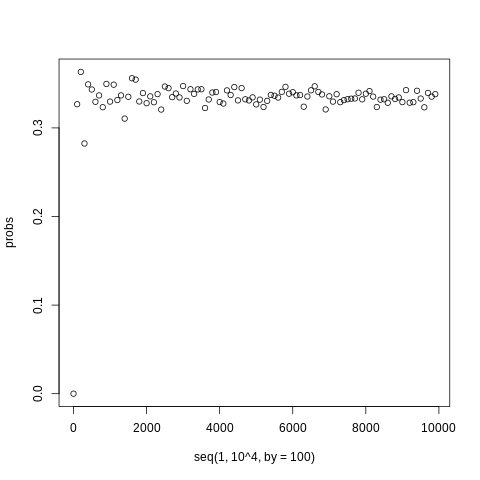

In [ ]:
%%R
#R

probs <- c()

for(i in seq(1, 10**4, by=100)){
    tiradas <- c()
    for(t in 1:i){
        tirada <- sample(d12, size=1) + sum(sample(d6, size=2, replace=TRUE))
        tiradas <- c(tiradas, tirada)
    }
    probabilidad <- sum(tiradas >= 16) / length(tiradas)
    probs <- c(probs, probabilidad)
}

plot(seq(1, 10**4, by=100), probs)

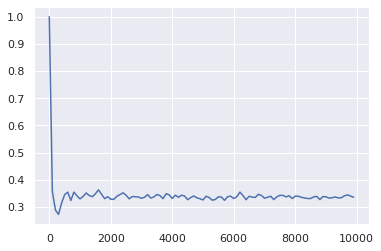

In [ ]:
plt.plot(range(1, 10**4, 100), probs, '-')

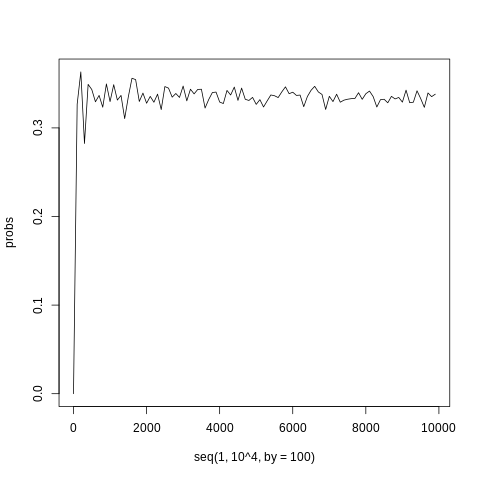

In [ ]:
%%R

plot(seq(1, 10**4, by=100), probs, type='l')

###1.4 Aplicación
Ahora que conocemos los 3 pasos anteriores, podemos intentar calcular probabilidades complejas. Antes de avanzar con el laboratorio, usaremos nuevamente este método para determinar una probabilidad de una tirada, esta vez, mucho más díficil.

2 compañeros, un hobbit y un hombre del lago, intentan rastrear lo que sospechan es una bestia salvaje. Para el hobbit no es una gran tarea, por lo que el se encargará de seguir el rastro principal con su habilidad de nivel 3 (además, había ganado un dado de ventaja anteriormente), mientras que el hombre actuará de guardia estando alerta ante alguna emboscada con su habilidad nivel 2. El hombre no ha podido conciliar el sueño correctamente, por lo que se encuentra *cansado*, lo que afectará el resultado de sus tiradas. El maestro del saber establece una dificultad de 16 para el hobbit y 14 para el hombre, y solo si ambos lográn cumplir sus respectivas pruebas lograrán seguirle el rastro a la bestia, permanecer juntos y no ser emboscados. *El jugador hombre teme por el destino de su personaje y cambiar sus dados por unos dados cargados con doble de probabilidad en los valores 4, 5 y 6*.

¿En qué se traduce esto? 
- Dado de ventaja: El personaje lanza un dado de 12 caras extra, y conserva el dado de mayor valor.
- Cansancio: Los dados de 6 caras lanzados por un personaje cansado ven alterados su resultado. Si el valor del dado es menor a 4 (dado < 4), su valor se considera 0.
- Dados cargados: En un dado normal, todo valor tiene probabilidad $1/6$ de salir. En los dados cargados, las probabilidades son $1/12$ para los valores 1, 2 y 3, y $1/4$ para los valores 4, 5 y 6. Son dados anti-cansancio. 

En resumen:
* Hobbit: Debe lanzar 2d12 (2 dados de 12 caras) y quedarse con el mejor de ellos, luego lanzar 3d6 (3 dados de 6 caras) normales, y compararse ante una dificultad de 16. 
* Hombre del lago: Debe lanzar 1d12 (1 dados de 12 caras), luego lanzar 2d6 (2 dados de 6 caras cargados) considerando el cansancio, y compararse ante una dificultad de 14.
* La probabilidad de éxito final considera que ambos tengan éxito.

* __1.4.1__: Completar ambos códigos complementarios, aplicando todos los pasos anteriores y presentando como respuesta un gráfico de convergencia con la probabilidad que ustedes creen es correcta. (<font color='red'>10 Puntos</font>)

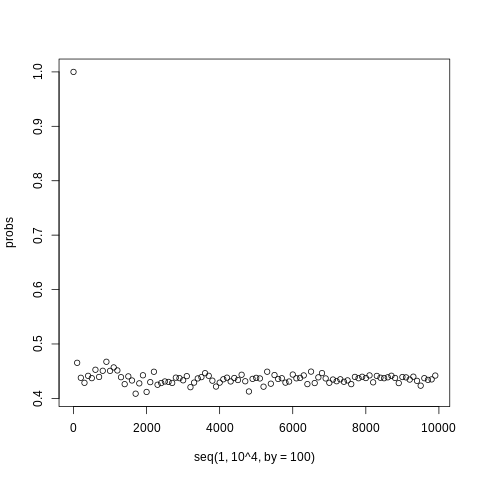

In [ ]:
%%R
#R

probs <- c()

for(i in seq(1, 10**4, by=100)){
  tiradas_hobbit <- c()
  tiradas_hombre <- c()
  for(t in 1:i){
    hobbit_d12 <- max(sample(d12, size=2, replace=TRUE))
    hobbit_d6 <- sample(d6, size=3, replace=TRUE)
    hombre_d12 <- sample(d12, size=1)
    hombre_d6 <- sample(d6, size=2, replace=TRUE, prob = c(1/12, 1/12, 1/12, 1/4, 1/4, 1/4))
    hombre_d6[hombre_d6 < 4] <- 0

    tirada_hobbit <- hobbit_d12 + sum(hobbit_d6)
    tirada_hombre <- hombre_d12 + sum(hombre_d6)
    tiradas_hobbit <- c(tiradas_hobbit, tirada_hobbit)
    tiradas_hombre <- c(tiradas_hombre, tirada_hombre)
  }
  exito_hobbit <- (tiradas_hobbit >= 16)
  exito_hombre <- (tiradas_hombre >= 14)
  probabilidad <- sum(exito_hobbit * exito_hombre) / length(exito_hobbit)
  probs <- c(probs, probabilidad)
}

plot(seq(1, 10**4, by=100), probs)

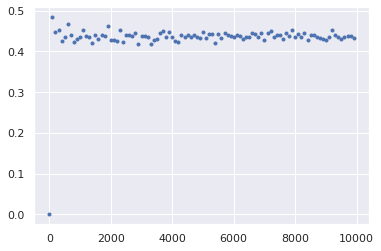

In [ ]:
# Python

probs = []

for i in range(1, 10**4, 100):
  tiradas_hobbit = []
  tiradas_hombre = []
  for t in range(i):
    hobbit_d12 = np.max(np.random.choice(d12, size=2, replace=True))
    hobbit_d6 = np.random.choice(d6, size=3, replace=True)
    hombre_d12 = np.random.choice(d12, size=1)
    hombre_d6 = np.random.choice(d6, size=2, replace=True, p = [1/12, 1/12, 1/12, 1/4, 1/4, 1/4])
    hombre_d6[hombre_d6 < 4] = 0

    tirada_hobbit = hobbit_d12 + np.sum(hobbit_d6)
    tirada_hombre = hombre_d12 + np.sum(hombre_d6)
    tiradas_hobbit.append(tirada_hobbit)
    tiradas_hombre.append(tirada_hombre)
  
  tiradas_hobbit = np.array(tiradas_hobbit).flatten()
  tiradas_hombre = np.array(tiradas_hombre).flatten()
  exito_hobbit = (tiradas_hobbit >= 16)
  exito_hombre = (tiradas_hombre >= 14)
  probabilidad = np.sum(exito_hobbit * exito_hombre) / len(exito_hobbit)
  probs.append(probabilidad)

plt.plot(range(1, 10**4, 100), probs, '.')


* __1.4.2__: ¿Cómo calcularía las probabilidades presentadas hasta ahora de forma teórica? Reflexione sobre esta posibilidad, no es necesario que haga el cálculo. (<font color='red'>5 Puntos</font>)

**Respuesta**

<font color="greed"> COMPLETAR </font> 

##2. Aplicación: Integración de Montecarlo

El [método de Montecarlo](https://es.wikipedia.org/wiki/Integraci%C3%B3n_de_Montecarlo) que se estudiará en esta sección nos ayudará a enteder la importancia del muestreo, el tamaño de la muestra y la convergencia, vistas en la sección anterior. Para este método, se usarán otras funciones que veremos a continuación.

El método de Montecarlo es una técnica de mucha utilidad usada para calcular integrales mediante aproximaciones a través de variables aleatorias uniformes y el cálculo de esperanza.

En términos simples, el método nos permite aproximar la siguiente integral:
$$\int_{0}^{1} f(x) dx$$
mediante la siguiente expresión:
$$\frac{1}{n}\sum_{i=1}^n f(v_i)$$
para $v = [v_0, v_1, ...., v_n] $ variables aleatorias uniformes $U(0, 1)$.

No queremos complicarnos demasiado con detalles del método como tal, pero sí nos interesa ver como se comporta la convergencia de este método. Para esto, analizaremos 4 funciones a ser integradas. Si están interesados en calcular integrales en más intervalos, es posible transformar una integral de un intervalo $[a, b]$ al intervalo $[0, 1]$.


###2.1 Muestreo uniforme
Para mostrar el método usaremos la función seno. Tenemos:
$$\int_0^1 sin(x) dx = 1- cos(1) \approx 0.45970$$
Comprobaremos si el método nos entrega este valor, y como converge a este valor.

Los pasos son los siguientes:
- Primero, necesitamos generar una secuencia de números aleatorios uniforme, en el intervalo $[0,1]$.
- Luego, tenemos que aplicar esta secuencia en la función definida en la integral, esta función debe ser vectorial para poder aplicarla a toda una lista o arreglo.
- Finalmente, tomamos la media de estos valores, y la comparamos con el valor de referencia.

Para esta pregunta, deberán responder en las celdas de Python. Se adjuntan celdas con la solución en R, para que puedan usarlas como guía, y seguir reforzando el concepto de similitud entre lenguajes.

In [ ]:
%%R
#R

v <- runif(10, 0, 1) 
cat('Variables:', v, '\n')
cat('Seno:', sin(v), '\n')
cat('Media:', mean(sin(v)))

Variables: 0.738252 0.9030163 0.8734501 0.7959244 0.1617759 0.9612306 0.1955631 0.9453616 0.7749564 0.9772536 
Seno: 0.6729961 0.7851983 0.7665491 0.7145106 0.1610711 0.8198967 0.194319 0.8107087 0.6996849 0.8289644 
Media: 0.6453899

* __2.1.1__: Aplicando los pasos descritos, obtenga una aproximación simple del valor de la integral de la función seno con un tamaño de muestra de 10. (<font color='red'>3 Puntos</font>)

In [ ]:
# Python

v = np.random.uniform(0, 1, 10)
print('Variables:', v)
print('Seno:', np.sin(v))
print('Media:', np.mean(np.sin(v)))

Variables: [0.97568136 0.54310394 0.5328281  0.61951761 0.87898277 0.24527231
 0.28061648 0.28389592 0.19230839 0.35189971]
Seno: [0.82808406 0.51679579 0.50797142 0.58064249 0.77009035 0.24282049
 0.27694807 0.28009774 0.19112524 0.34468172]
Media: 0.45392573679463644


###2.2 Convergencia
Estudiaremos la convergencia que vimos anteriormente, y un gráfico que muestra el error relativo al valor de referencia.
$$ Error\_relativo = \left|\frac{x_{aprox} - x_{real}}{x_{real}} \right|$$

*Hint: valor absoluto es su amigo al calcular errores.*

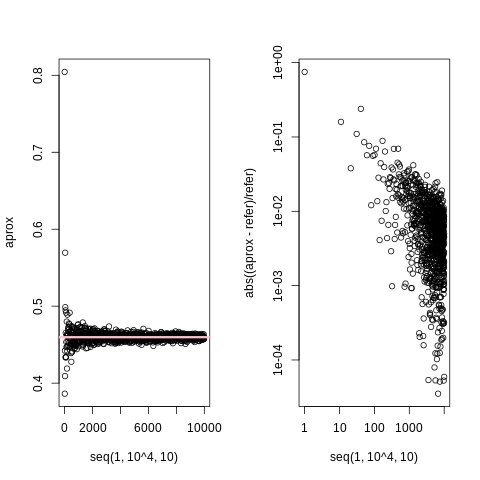

In [ ]:
%%R
#R

refer <- 0.45970
aprox <- c()

for(i in seq(1, 10**4, 10)){
    v <- runif(i, 0, 1)
    aprox <- c(aprox, mean(sin(v)))
}

par(mfrow=c(1,2))
plot(seq(1, 10**4, 10), aprox)
abline(h=refer, col='pink', lwd=3)

plot(seq(1, 10**4, 10), abs((aprox - refer)/refer), log='xy')

* __2.2.1__: Aplicando los pasos vistos en el ejercicio 1, obtenga un gráfico de convergencia del valor de la integral de la funcion seno. Grafique también como se comporta el error relativo mientras el valor converge. (<font color='red'>4 Puntos</font>)

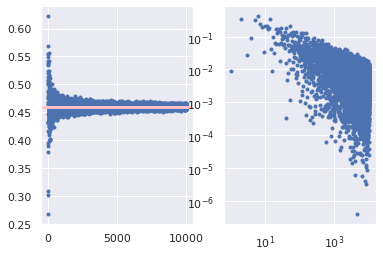

In [ ]:
# Python

refer = 0.45970
aprox = []

for i in range(1, 10**4):
  v = np.random.uniform(0, 1, i)
  aprox.append(np.mean(np.sin(v)))

plt.subplot(1, 2, 1)
plt.plot(range(1, 10**4), aprox, '.')
plt.axhline(refer, color='pink', lw=3)

plt.subplot(1, 2, 2)
plt.plot(range(1, 10**4), abs((np.array(aprox) - refer)/refer), '.')
plt.yscale('log')
plt.xscale('log')

###2.3 Estimando $\pi$
Antes de entrar completamente en el método, veremos una de las aplicaciones más didacticas del método de Montecarlo. Es posible estimar el valor de $\pi$ por medio del muestreo aleatorio. Esta aplicación se basa en estimar el área de un círculo, respecto del cuadrado uniforme.

Geométricamente, conocemos las áreas de las figuras:
$$Área(cuadrado) = 1\cdot 1 = 1$$
$$Área(círculo) = \pi \cdot \left(\frac{1}{2}\right)^2 = \frac{\pi}{4} $$
Sí calculamos las proporciones de las áreas, se tiene:
$$\frac{Área(círculo/4)}{Área(cuadrado/4)} = \frac{\pi}{4}$$
No afecta tomar el círculo y cuadrado entero, o solo tomar un cuadrante, es lo mismo, por lo que nuestro muestreo $[0, 1]$ aún nos sirve.
Lo que propone el método es que podemos muestrear puntos en un cuadrado unitario, calcular la proporción de puntos dentro de ambas figuras, mantener la relación anterior y así calcular una aproximación de $\pi$:
$$\pi = 4\cdot \frac{puntos\_muestra(círculo)}{puntos\_muestra(cuadrado)}$$
Comprobemos esta afirmación generando los gráficos del inciso anterior, para saber si nuestras aproximaciones son correctas, y con cuantos datos tenemos errores bajos.

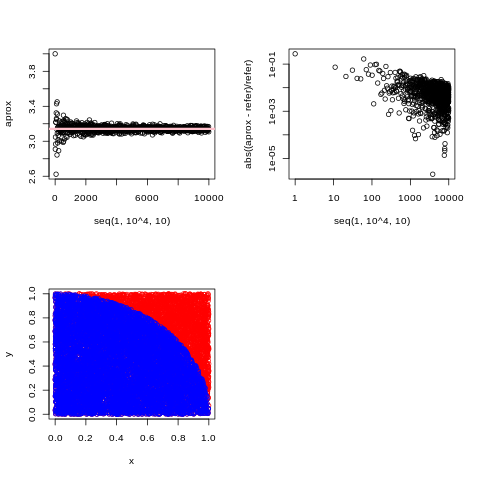

In [ ]:
%%R
#R

refer <- pi
aprox <- c()

for(i in seq(1, 10**4, 10)){
    x <- runif(i, 0, 1)
    y <- runif(i, 0, 1)
    circle_points <- sum(x*x + y*y <= 1)
    aprox <- c(aprox, 4*circle_points/i)
}

par(mfrow=c(2,2))
plot(seq(1, 10**4, 10), aprox)
abline(h=refer, col='pink', lwd=3)

plot(seq(1, 10**4, 10), abs((aprox - refer)/refer), log='xy')

plot(x, y, col='red')
points(x[x*x + y*y <= 1], y[x*x + y*y <= 1], col='blue')

* __2.3.1__: Obtenga el gráfico de convergencia y de error para la aproximación de $\pi$. Puede graficar los puntos como en la referencia para tener una mejor idea de las proporciones calculadas. (<font color='red'>8 Puntos</font>)

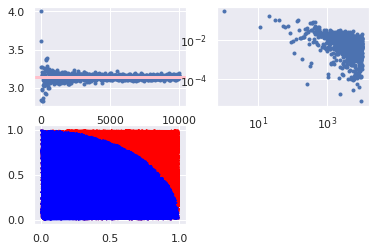

In [ ]:
# Python

refer = np.pi
aprox = []

for i in range(1, 10**4, 10):
  x = np.random.uniform(0, 1, i)
  y = np.random.uniform(0, 1, i)
  circle_points = np.sum(x*x + y*y <= 1)
  aprox.append(4*circle_points/i)

plt.subplot(2, 2, 1)
plt.plot(range(1, 10**4, 10), aprox, '.')
plt.axhline(refer, color='pink', lw=3)

plt.subplot(2, 2, 2)
plt.plot(range(1, 10**4, 10), abs((np.array(aprox) - refer)/refer), '.')
plt.yscale('log')
plt.xscale('log')

plt.subplot(2, 2, 3)
plt.plot(x, y, color='red')
plt.plot(x[x*x + y*y <= 1], y[x*x + y*y <= 1], color='blue')

###2.4 Funciones
Repita el método para las funciones de las secciones siguientes. Si la función no se encuentra implementada, deberemos definirla manualmente.

*Los valores de referencia para estas integrales fueron obtenidos usando WolframAlpha.*

$$\int_0^1 \frac{1}{e^x + x^2} \approx 0.56575$$

* __2.4.1__: Aplicando los pasos descritos, obtenga el gráfico de convergencia y de error para la aproximación de esta integral. (<font color='red'>2 Puntos</font>)

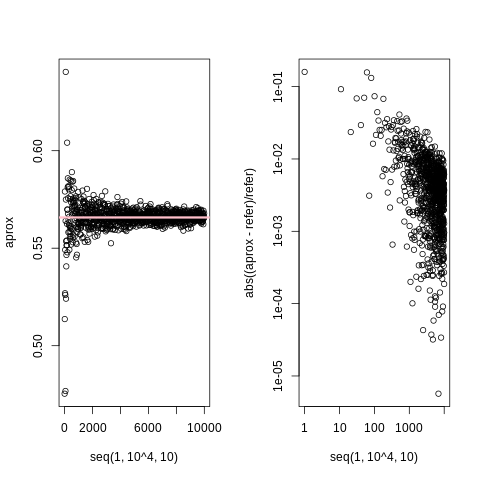

In [ ]:
%%R
#R

f_x <- function(x){
    return(1/(exp(x) + x**2))
}

refer <- 0.56575
aprox <- c()

for(i in seq(1, 10**4, 10)){
    v <- runif(i, 0, 1)
    aprox <- c(aprox, mean(f_x(v)))
}

par(mfrow=c(1,2))
plot(seq(1, 10**4, 10), aprox)
abline(h=refer, col='pink', lwd=3)

plot(seq(1, 10**4, 10), abs((aprox - refer)/refer), log='xy')

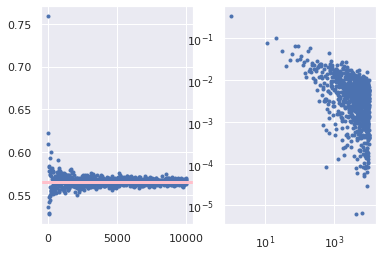

In [ ]:
# Python

def f_x(x):
  return 1/(np.exp(x) + x**2)


refer = 0.56575
aprox = []

for i in range(1, 10**4, 10):
  v = np.random.uniform(0, 1, i)
  aprox.append(np.mean(f_x(v)))

plt.subplot(1, 2, 1)
plt.plot(range(1, 10**4, 10), aprox, '.')
plt.axhline(refer, color='pink', lw=3)

plt.subplot(1, 2, 2)
plt.plot(range(1, 10**4, 10), abs((np.array(aprox) - refer)/refer), '.')
plt.yscale('log')
plt.xscale('log')


$$\int_0^1 tan(x^3 - 1) \approx -1.0486$$

* __2.4.2__: Aplicando los pasos descritos, obtenga el gráfico de convergencia y de error para la aproximación de esta integral. (<font color='red'>2 Puntos</font>)

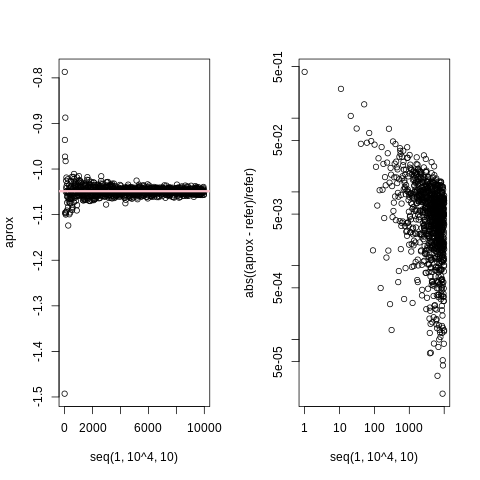

In [ ]:
%%R
#R

f_x <- function(x){
    return(tan(x**3 - 1))
}

refer <- -1.0486
aprox <- c()

for(i in seq(1, 10**4, 10)){
    v <- runif(i, 0, 1)
    aprox <- c(aprox, mean(f_x(v)))
}

par(mfrow=c(1,2))
plot(seq(1, 10**4, 10), aprox)
abline(h=refer, col='pink', lwd=3)

plot(seq(1, 10**4, 10), abs((aprox - refer)/refer), log='xy')

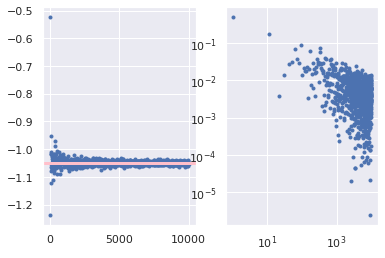

In [ ]:
# Python

def f_x(x):
  return np.tan(x**3 - 1)


refer = -1.0486
aprox = []

for i in range(1, 10**4, 10):
  v = np.random.uniform(0, 1, i)
  aprox.append(np.mean(f_x(v)))

plt.subplot(1, 2, 1)
plt.plot(range(1, 10**4, 10), aprox, '.')
plt.axhline(refer, color='pink', lw=3)

plt.subplot(1, 2, 2)
plt.plot(range(1, 10**4, 10), abs((np.array(aprox) - refer)/refer), '.')
plt.yscale('log')
plt.xscale('log')


$$\int_0^1 x\cdot log(x^2) = -0.5$$

* __2.4.3__: Aplicando los pasos descritos, obtenga el gráfico de convergencia y de error para la aproximación de esta integral. (<font color='red'>2 Puntos</font>)

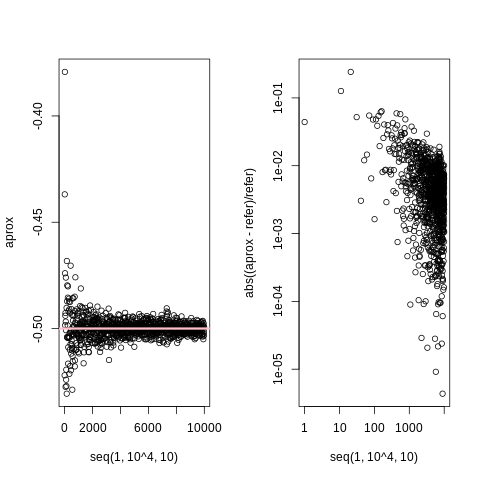

In [ ]:
%%R
#R

f_x <- function(x){
    return(x * log(x**2))
}

refer <- -0.5
aprox <- c()

for(i in seq(1, 10**4, 10)){
    v <- runif(i, 0, 1)
    aprox <- c(aprox, mean(f_x(v)))
}

par(mfrow=c(1,2))
plot(seq(1, 10**4, 10), aprox)
abline(h=refer, col='pink', lwd=3)

plot(seq(1, 10**4, 10), abs((aprox - refer)/refer), log='xy')

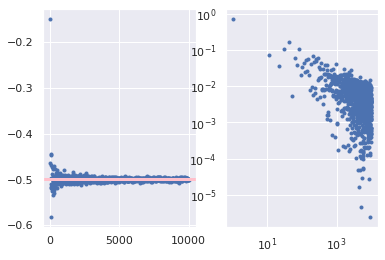

In [ ]:
# Python

def f_x(x):
  return x * np.log(x**2)


refer = -0.5
aprox = []

for i in range(1, 10**4, 10):
  v = np.random.uniform(0, 1, i)
  aprox.append(np.mean(f_x(v)))

plt.subplot(1, 2, 1)
plt.plot(range(1, 10**4, 10), aprox, '.')
plt.axhline(refer, color='pink', lw=3)

plt.subplot(1, 2, 2)
plt.plot(range(1, 10**4, 10), abs((np.array(aprox) - refer)/refer), '.')
plt.yscale('log')
plt.xscale('log')


* __2.4.4__: Reflexione sobre los intervalos usados hasta ahora, las cantidades de experimentos o simulaciones usados, las magnitudes del error, etc. ¿Qué relación tiene esta propiedad de convergencia con la Ley Débil de los Grandes Números?  (<font color='red'>4 Puntos</font>)

**Respuesta**

<font color="greed"> COMPLETAR </font> 

## 3. Inferencia Bayesiana


En la siguiente sección, estudiaremos la **inferencia bayesiana** y su uso para la estimación de parámetros.

<center>
<img src="https://imgs.xkcd.com/comics/frequentists_vs_bayesians_2x.png" width="40%"></img>
</center>


### The Bayesian procedure

Estamos estudiando el comportamiento de un evento aleatorio. Este evento puede ser descrito por una **distribución $\Pi$** asociada a un **parámetro $\theta$** (o vector de parámetros $\vec{\theta}$). 

Por ejemplo, la probabilidad de que un experimento x sea exitoso se   describe por una distribución de **bernoulli**, definida por un **parámetro probabilidad de éxito $p$**. Entonces, para este caso se tiene que la distribución asociada $\Pi(\theta)$ es $Be(p)$.

El evento aleatorio que se estudia responde a una distribución $\Pi$ conocida. Sin embargo, no se sabe cuál es el valor de su parámetro $\theta$. 

Para tal evento aleatorio se tiene a disposición una cantidad finita de observaciones, la cual se puede referir como muestra aleatoria de tamaño $n$, proviniendo de la distribución $\Pi(\theta)$.

$$X = \{X_1, ..., X_n\}$$.

$$ X_j \sim \Pi(\theta)$$

Es posible estimar el valor de $\theta$ con métodos frecuentistas. Pero, nuestro objetivo no es tan sólo saber qué valor es, si no tener una medida de incertidumbre o confianza en el resultado. ¿Cómo podemos obtener esta medida?. 

La respuesta está en el **Teorema de Bayes**. Éste nos permite calcular la **probabilidad** de que la muestra aleatoria provenga de una distribución $\Pi(\theta_i)$. Es decir, obtenemos la probabilidad de que $\theta$ tome el valor $\theta_i$, dado que se observó **$X$**.

Esto queda encapsulado en la siguiente expresión:

$$ P(\theta = \theta_i | X) = P(\theta_i | X) = \frac{P(X|\theta_i)P(θ_i)}{P(X)}$$

Es importante resaltar esto: **obtenemos una probabilidad del parámetro de la distribución, no la probabilidad de un valor de $X_j$**

Por extensión, si podemos calcular la probabilidad para un $\theta_i$, también podríamos calcular la probabilidad para cada valor posible de $\theta$. De esta forma, obtenemos una **distribución de probabilidad de $\theta$**.



* __3.0__: Antes de continuar, defina el concepto de **incertidumbre (uncertainty)** en este contexto de estadísticas. Identifique y defina los componentes de teorema de bayes: **priori, likelihood, constante de normalización** y **posteriori**.  (<font color='red'>5 Puntos</font>)




**Respuesta**

<font color="greed"> COMPLETAR </font> 

Dado estos antecedenes, podemos definir un procedimiento para la inferencia bayesiana para la estimación del parámetro $\theta$:

**Nota:** Usaremos el términos $\theta$ (sin subíndice) cuando hablamos de todos los valores posibles de $\theta$, usaremos $\theta_i$ cuando hablamos de un valor de $\theta$ en específico. 


1. Definir nuestra creencia inicial sobre el parámetro, la distribución a priori de los distintos $\theta$'s,  $P(\theta)$.
2. Recolectar los datos $X^t$ en un tiempo $t$, a través de la experimentación, observaciones, etc.
3. Actualizar nuestras creencias utilizando el **teorema de bayes**, la distribución posterior. $P(\theta|X^t) = \frac{P(X^t|\theta)P(\theta)}{P(X^t)}$

4. Repetir el proceso cada vez que obtengamos más datos $X^{t+1}$ en un tiempo $t+1$. Esta vez se utiliza como priori el posteriori calculado.
 
Notar que si $\theta$ es discreto, entonces podemos obtener la distribución de probabilidad de todos los valores de $\theta$ si calculamos la probabilidad para cada $\theta_i$ individualmente.


En la siguiente sección afrontarán al "_acertijo de la bolsa de dados_" utilizando este procedimiento. 

### 3.1 El Acertijo de la Bolsa de Dados

*Está Pedrito caminando rumbo a su casa, cuando aparece frente a él una imponente figura ¡Era la Parca! "Pedrito, ha llegado la Parca a buscarte" - dijo la Parca. Pedrito sabía que era inevitable, pero conocía una antigua historia, se puede ganar tiempo si desafías a la Parca en un juego. Pedrito recuerda que tiene 6 dados en su bolsillo, rápidamente mete la mano y __saca 2 dados__. "Oh Parca, ¿eres capaz de adivinar que par de dados acabo de sacar? Si fallas, te vas y no vuelves jamás." - dijo Pedrito. "Es imposible si no me das algunas pistas." - Le responde la Parca. Pedrito le explica que en su bolsillo __habían 6 dados: 3 de D4, 2 de D6 y uno D8__, y por un precio, __lanzará los dados tres veces y diciendole la suma de los números obtenidos de cada lanzamiento__. "¿Cuál es el precio?" - dijo la Parca. "Los primeros tres lanzamiento por un día, pero tres nuevos lanzamientos por el doble del precio anterior". - le responde Pedrito. La Parca acepta.*


¿Podrás ayudar a la Parca a que se lleve a Pedrito lo más pronto posible?

Examinando el problema tenemos que: una observación **$X_j$** es la **suma de los dos dados lanzados**, y **$X^t$** corresponde a tres observaciones; Estos provienen de una distribución $\Pi(\theta)$, donde $\theta$ es el par de dados sacados, ya que la frecuencia de cada suma depende de que par de dados lanzados.

Definamos lo siguiente:

In [2]:
# Los dados que Pedrito tenia en el bolsillo
dados = [4, 4, 4, 6, 6, 8]

# Los posibles pares de dados que pudo sacar Pedrito
thetas = [
    "(4, 4)",
    "(4, 6)",
    "(4, 8)",
    "(6, 6)",
    "(6, 8)",
]

*La Parca* debe estar seguro de su respuesta si no quiere arriesgarse a dejar ir a *Pedrito*. *La Parca* sabe que lo mejor es usar el Teorema de Bayes, aunque esto le cueste unos días, es mucho mejor que usar un método frecuentista, el cual requiere de muchas observaciones para converger a un valor, *la Parca* conoce muy bien el crecimiento exponencial, sabe que esto terminaría siendo igual a tener que esperar una eternidad, lo cual tampoco es una opción.

* __3.1.0__: Complete la siguiente función que será útil el resto de la sección, esta muestra la distribución de probabilidad de los distintos valores que puede tomar $\theta$.  (<font color='red'>5 Puntos</font>)


In [3]:
def show_distribution(probability_distribution, theta_values):
    x_values_index =list(range(len(theta_values)))
    x_values_names = list(map(str, theta_values))
    plt.figure(figsize=(8,3))
    plt.title("Distribución $\\theta$")
    plt.bar(x_values_index, probability_distribution)
    plt.ylim((0,1))
    plt.xticks(x_values_index, x_values_names)
    plt.ylabel("$P(\\theta)$")
    plt.xlabel("$\\theta$")
    plt.show()

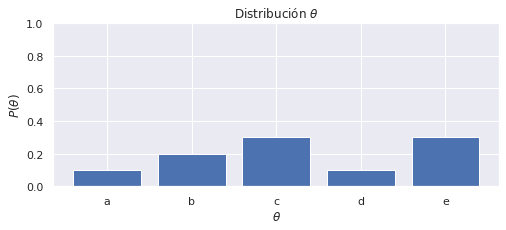

In [4]:
show_distribution([0.1, 0.2, 0.3, 0.1, 0.3], ["a", "b", "c", "d", "e"])

#### Priori

$$P(\theta = \theta_i)$$

La probabilidad a priori es nuestra creencia inicial, previa a ver los datos. Esta puede definirse según el problema. Esta probabilidad responde a la pregunta **¿Cuál es la probabilidad de sacar el par $\theta_i$ sin haber visto ningún lanzamiento?**


* __3.1.1__: Complete la siguiente función la cuál obtiene la probabilidad a priori de una $\theta_i$(<font color='red'>5 
Puntos</font>)

In [5]:
# Utilice esta celda como borrador para estimar estas probabilidades, realizar 
# calculos sencillos o simplemente escribir su razonamiento.
# No borrar, esta celda se considera para la evaluación.
posibles = math.factorial(len(dados))/(math.factorial(2)*math.factorial(len(dados) - 2))
posibles

15.0

In [6]:
def P(theta_i):
  """
    P la probabilidad de obtener un 'theta' 
    Retorna un valor entre (0...1).
      args:
        theta_i:  Para que valor de theta.
  """
  # COMPLETAR
  # No hay problema con "hardcodear" las probabilidades ;)
  return {"(6, 8)": 2/15, "(4, 4)": 3/15, "(4, 8)": 3/15, "(4, 6)": 6/15, "(6, 6)": 1/15}[theta_i]

In [17]:
priori

[0.2, 0.4, 0.2, 0.06666666666666667, 0.13333333333333333]

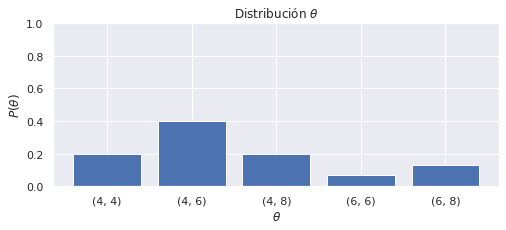

In [7]:
priori = [P(theta_i) for theta_i in thetas]
show_distribution(priori, thetas)

#### Probabilidad Condicional

$$P(X_j|\theta_i)$$

Una probabilidad condicional restringe el espacio de muestras de donde proviene $X_j$. La pregunta cambia de "_¿Cuál es la probabilidad de $X_j$_" a **¿"Cuál es la probabilidad de $X_j$  cuando $\theta$ es $\theta_i$"?**

Por ejemplo, la probabilidad de que la suma de los dados sea 12, dado que el par de dados es (4,4) es 0. No pueden sumar $12$ si lanzo dos dados de 4 caras, ya que el valor máximo alcanzable es 8.

* __3.1.2__: Complete la siguiente función la cual retorna la probabilidad de un valor de $X_j$ dado que proviene de una distribución $\Pi(\theta_i$). (<font color='red'>5 Puntos</font>)

In [8]:
# Utilice esta celda como borrador para estimar estas probabilidades, realizar 
# calculos sencillos o simplemente escribir su razonamiento.
# No borrar, esta celda se considera para la evaluación.

from collections import Counter

for dados_ in thetas:
  d1, d2 = map(int, [dados_[1], dados_[-2]])
  c = Counter([i+1+j+1 for i in range(d1) for j in range(d2)])
  total = sum(c.values())
  for k in c:
    c[k] /= total 
    c[k] = round(c[k], 4)
  print(f"({d1}, {d2}):", c)

(4, 4): Counter({5: 0.25, 4: 0.1875, 6: 0.1875, 3: 0.125, 7: 0.125, 2: 0.0625, 8: 0.0625})
(4, 6): Counter({5: 0.1667, 6: 0.1667, 7: 0.1667, 4: 0.125, 8: 0.125, 3: 0.0833, 9: 0.0833, 2: 0.0417, 10: 0.0417})
(4, 8): Counter({5: 0.125, 6: 0.125, 7: 0.125, 8: 0.125, 9: 0.125, 4: 0.0938, 10: 0.0938, 3: 0.0625, 11: 0.0625, 2: 0.0312, 12: 0.0312})
(6, 6): Counter({7: 0.1667, 6: 0.1389, 8: 0.1389, 5: 0.1111, 9: 0.1111, 4: 0.0833, 10: 0.0833, 3: 0.0556, 11: 0.0556, 2: 0.0278, 12: 0.0278})
(6, 8): Counter({7: 0.125, 8: 0.125, 9: 0.125, 6: 0.1042, 10: 0.1042, 5: 0.0833, 11: 0.0833, 4: 0.0625, 12: 0.0625, 3: 0.0417, 13: 0.0417, 2: 0.0208, 14: 0.0208})


In [9]:
def P_theta(X_j, theta_i):
    """
    P_theta la probabilidad de obtener 'X_j' utilizando los dados 'theta_i' 
    Retorna un valor entre (0...1).
      args:
        X_j:      Una observacion, lanzamiento de dados, etc.
        theta_i:  Parametro condicional.
    """
    # COMPLETAR
    # No hay problema con "hardcodear" las probabilidades ;)
    probability = {
        "(4, 4)": { 2: 0.06, 3: 0.12, 4: 0.19, 5: 0.25, 6: 0.19, 7: 0.12, 8: 0.06 },
        "(4, 6)": { 2: 0.04, 3: 0.08, 4: 0.12, 5: 0.17, 6: 0.17, 7: 0.17, 8: 0.12,  9: 0.08,  10: 0.04 },
        "(4, 8)": { 2: 0.03, 3: 0.06, 4: 0.09, 5: 0.12, 6: 0.12, 7: 0.12, 8: 0.12, 9: 0.12, 10: 0.09, 11: 0.06, 12: 0.03 },
        "(6, 6)": { 2: 0.03, 3: 0.06, 4: 0.08, 5: 0.11, 6: 0.14, 7: 0.17, 8: 0.14, 9: 0.11, 10: 0.08, 11: 0.06, 12: 0.03 },
        "(6, 8)": { 2: 0.02, 3: 0.04, 4: 0.06, 5: 0.08, 6: 0.1,  7: 0.12, 8: 0.12, 9: 0.12, 10: 0.1,  11: 0.08, 12: 0.06, 13: 0.04, 14: 0.02}
    }

    p = probability[theta_i]
    if X_j not in p:
      return 0.0
    return p[X_j]

In [10]:
print("P(12|(4, 4)):", P_theta(12, "(4, 4)"))
print("P( 8|(4, 4)):", P_theta(8, "(4, 4)"))
print("P( 2|(4, 6)):", P_theta(2, "(4, 6)"))
print("P(12|(4, 8)):", P_theta(12, "(4, 8)"))
print("P( 2|(6, 6)):", P_theta(12, "(6, 6)"))
print("P(12|(6, 8)):", P_theta(14, "(6, 8)"))

P(12|(4, 4)): 0.0
P( 8|(4, 4)): 0.06
P( 2|(4, 6)): 0.04
P(12|(4, 8)): 0.03
P( 2|(6, 6)): 0.03
P(12|(6, 8)): 0.02


#### Likelihood

$$  L(\theta_i| X) = P(X|\theta_i) =  P(X_1, ..., X_n| \theta_i) = \prod_{j=1}^n P(X_j|\theta_i)$$

El Likelihood, o en español, verocimilitud, es una función de $\theta$ con $X$ "fijo". Nos permite evaluar que tan bien se ajusta un $\theta_i$ a una muestra.

*  __3.1.3__: Complete la siguiente función la cual retorna el likelihood para un $\theta_i$ dado que se observa $X$ y está sujeta la regla de probabilidad condicional `P_theta`. (<font color='red'>5 Puntos</font>)

In [18]:
priori

[0.2, 0.4, 0.2, 0.06666666666666667, 0.13333333333333333]

In [11]:
def likelihood(theta_i, X, P_theta):
    """
    likelihood de un theta_i para una muestra X utilizando las probabilidades dadas por P_theta.
      args:
        theta_i:    que par de dados estamos usando.
        X:          lista con los datos de la experimentación, observaciones, lanzamientos de dados, etc.
        P_theta:    funcion de probabilidad condicional P(X_j|theta_i)
      return:
        likelihood para un valor de theta_i y una muestra X 
    """
    # COMPLETAR
    return np.prod([P_theta(X_j, theta_i) for X_j in X])

In [12]:
print("L((4, 4), [2, 4, 5]):",  likelihood("(4, 4)", [2, 4, 5], P_theta))
print("L((4, 6), [10, 9, 5]):", likelihood("(4, 6)", [10, 9, 5], P_theta))
print("L((6, 6), [10, 9, 5]):", likelihood("(6, 6)", [1], P_theta))

L((4, 4), [2, 4, 5]): 0.00285
L((4, 6), [10, 9, 5]): 0.0005440000000000001
L((6, 6), [10, 9, 5]): 0.0


#### Constante de Normalización

$$ P(X) = \sum_{\theta_i \in  \theta}  P(X|\theta_i)  P(\theta_i)$$


Esta constante llevar nuestros resultados al dominio $[0, 1]$.

* __3.1.4__: (<font color='red'>5 Puntos</font>)

In [13]:
def normalization_const(thetas, X, P_theta, priori):
    """
    constante de normalizacion
      args:
        thetas:       lista con los diferentes valores de theta
        X:            muestra aleatoria
        P_theta:      funcion de probabilidad condicional P(X_j|theta_i)
        priori:       distribucion a priori, lista con las probabilidades de cada theta
      return:
        constante de normalizacion P(X)
    """

    # COMPLETAR
    return np.sum([P*likelihood(theta_i, X, P_theta) for theta_i, P in zip(thetas, priori)])

In [14]:
print(normalization_const(thetas, [8], P_theta, priori)) #0.10933333333333332

0.10933333333333332


#### Posteriori

$$P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)} \rightarrow \{ \frac{P(X|\theta_i)P(\theta_i)}{P(X)} : \forall \theta_i \in \theta \}$$

* __3.1.5__: Utilice las funciones anteriores para completar la función para actualizar sus creecias, calcular la distribución a posteriori. (<font color='red'>5 Puntos</font>)

In [15]:
def posteriori(priori, thetas, P_theta, X):
    """
    Distribucion a posteriori.
      args:
        priori: Distribucion a priori para los diferentes thetas
        thetas:             valores de los diferentes thetas
        P_theta:            funcion P(X_j|theta_i)
        X:                  muestra aleatoria.
      return:
        posterior_distribution: Distrubucion a posteriori. Una lista con la 
                                probabilidad posteriori de cada theta.
    """
    # COMPLETAR
    N = normalization_const(thetas, X, P_theta, priori)
    posterior_distribution = [ likelihood(theta_i, X, P_theta)*P/N for theta_i, P in zip(thetas, priori)]
    return posterior_distribution

#### Visualizando Resultados

* __3.1.5__: Ejecute la siguiente función, ¿Cuáles dados tiene Pedrito en su mano? ¿Cuanto es la cantidad minima de meses que necesita pagar la parca para dar una respuesta certera? (<font color='red'>5 Puntos</font>)

In [16]:
data = [[10, 7, 4],
 [11, 2, 10],
 [8, 6, 7],
 [6, 6, 7],
 [7, 5, 6],
 [2, 12, 8],
 [4, 6, 6],
 [4, 6, 8],
 [7, 12, 12],
 [7, 3, 6]]

@interact(priori=fixed(priori), thetas=fixed(thetas), X=fixed(data), pistas=(0, len(data)+1, 1), P_theta=fixed(P_theta))
def show_updates(priori, thetas, P_theta, X, pistas=0):
    X = X[:pistas]
    priori_t = priori
    print("Lanzamientos:", X)
    print(f"Precio a pagar: {0 if pistas == 0 else 2**(pistas-1)} dias.")
    for X_t in X:
        priori_t =  posteriori(priori_t, thetas, P_theta, X_t)

    show_distribution(priori_t, thetas)

interactive(children=(IntSlider(value=0, description='pistas', max=11), Output()), _dom_classes=('widget-inter…


**Respuesta**

<font color="greed"> COMPLETAR </font> 


### 3.2 PyMC3: Probabilistic Programming in Python

En la sección anterior se estudió cómo de actualizar un priori en el caso de un $\theta$ discreto. A continuación revisaremos un [ejemplo](https://docs.pymc.io/notebooks/updating_priors.html) donde el $\theta$ provienen de un dominio continuo. Esta vez utilizará las herramientas disponibles en [PyMC3](https://docs.pymc.io/). 




* __3.2.0__:Ejecute y analice el siguiente código. ¿Qué es lo que hace? ¿Por qué se utiliza `y = stats.gaussian_kde(samples)(x)` en la función `from_posteriori` (marcado con `# <-THIS`)?(<font color='red'>5 Puntos</font>)

In [ ]:
!pip install pymc3

In [ ]:
import pymc3 as pm

In [ ]:
def show_traces(traces, true_mu, true_sigma):
    print('Posterior distributions after ' + str(len(traces)) + ' iterations.')
    for param in ['mu', 'sigma']:
        plt.figure(figsize=(8, 2))
        for update_i, trace in enumerate(traces, start=1):
            samples = trace[param]
            smin, smax = np.min(samples), np.max(samples)
            x = np.linspace(smin, smax, 100)
            y = stats.gaussian_kde(samples)(x)
            plt.plot(x, y, alpha = 1.0 if len(traces) == update_i else 0.2, c="r")
        true_param = {'mu': true_mu, 'sigma': true_sigma}[param]
        plt.axvline(true_param, c='k', linestyle="--", label=f"true {param} = {true_param}")
        plt.ylabel('Frequency')
        plt.title(param)
        plt.legend()

def from_posterior(param, samples, k=100):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, k)
    
    # Aproxima el posteriori
    y = stats.gaussian_kde(samples)(x) # <- THIS

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    return pm.Interpolated(param, x, y)

In [ ]:
# theta verdaderos de la distribucion
true_mu = 55.0
true_sigma = 4.20

resamples = 4  # cuantas veces actualizamos
samples = 250    # cuantas observaciones por actualizacion

# Esto es para obtener resultados replicables
np.random.seed(1357)

# Generamos los datos de las observaciones
data = np.random.normal(loc=true_mu, scale=true_sigma, size=(resamples, samples))

# Separamos en una lista cada resampling
Xts = [Xt for Xt in data]
X0 = Xts[0]
Xts = Xts[1:]

print("X^0 mean:", np.mean(X0))
print("X^0 std:", np.std(X0))

X^0 mean: 55.2825161006391
X^0 std: 3.877564897082572


In [ ]:
traces = []
with pm.Model() as m0:
    mu = pm.Normal('mu', mu=np.mean(X0), sd=10)
    sigma = pm.Uniform('sigma', 0, np.std(X0)*2)

    X = pm.Normal('X', mu=mu, sd=sigma, observed=X0)

    traces.append(pm.sample(250, tune=500, init='adapt_diag'))

Only 250 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, mu]
100%|██████████| 750/750 [00:00<00:00, 1283.85it/s]


Posterior distributions after 1 iterations.


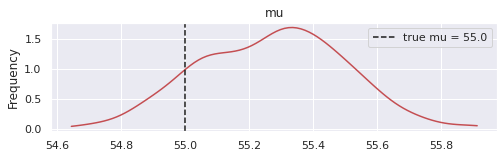

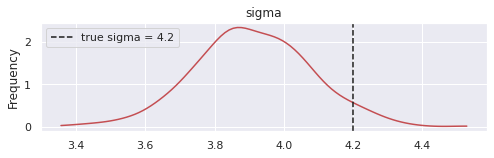

In [ ]:
show_traces(traces, true_mu, true_sigma)

In [ ]:
previous_posterior = traces[0]
for Xt in Xts:
  model = pm.Model()
  with model:
      mu = from_posterior('mu', previous_posterior['mu'])
      sigma = from_posterior('sigma', previous_posterior['sigma'])
      X = pm.Normal('X', mu=mu, sd=sigma, observed=Xt)
      trace = pm.sample(250, tune=500, init='adapt_diag')
      traces.append(trace)
      previous_posterior = trace

Only 250 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, mu]
100%|██████████| 750/750 [00:01<00:00, 692.32it/s]
The acceptance probability does not match the target. It is 0.8920599055617388, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
Only 250 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, mu]
100%|██████████| 750/750 [00:01<00:00, 742.20it/s]
Only 250 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, mu]
100%|██████████| 750/750 [00:00<00:00, 792.21it/s]


In [ ]:
@interact(iterations=(1, resamples))
def show_interactive(iterations=1):
  show_traces(traces[:iterations], true_mu, true_sigma)

interactive(children=(IntSlider(value=1, description='iterations', max=4, min=1), Output()), _dom_classes=('wi…


**Respuesta**

<font color="greed"> COMPLETAR </font> 

* __3.2.1__: Basadose en sus conocimientos y en esta experiencia del laboratorio. ¿Cuáles son las diferencias entre la inferencia frecuentista (secciónes 1-2) y la inferencia bayesiana (sección 3)? Comente sobre los supuestos de cada *approach*, sobre las ventajas y desventajas de cada una, y en que situaciones o problemas es prefererible usar una o la otra. (<font color='red'>5 Puntos</font>)



**Respuesta**

<font color="greed"> COMPLETAR </font> 

Felicidades! han completado el segundo Laboratorio de Estadística Computacional (LEC)

Recuerden contestar todas las preguntas y llenar la tabla con la información de su grupo.